In [363]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import linregress

In [364]:
# Read the CSV dataset file
dataset = pd.read_csv('DEI Dataset.csv')

In [365]:
#Load the first few line like head of the dataset
dataset.head()

,Id,Name,Surname,Division,Manager,Gender,Sexual_Orientation,LGBTQ,Indigenous,Ethnicity,...,Minority,Veteran,Date of Birth,Age,Preferred Name,Nationality,Hobbies,Pronouns,Mobile Number,Email
0,1,Deborah,Addison,IT,No,Transgender,Heterosexual,Prefer not to say,No,White,...,No,No,6/4/1993,29,Deborah,Polish,Travelling,They/them/theirs,363 436 1096,Deborah.Addison@mail.ca
1,2,Mona,Hill,Marketing,No,Male,Heterosexual,No,Yes,White,...,Yes,No,8/2/1963,59,Mona,Lao,Reading,He/him/his,905 980 9989,Mona.Hill@mail.ca
2,3,Kimberly,Shelton,Finance,No,Female,Heterosexual,No,No,White,...,No,No,4/25/1979,43,Kimberly,Canadian,Sports,She/her/hers,788 356 1577,Kimberly.Shelton@mail.ca
3,4,Denis,Robinson,HR,No,Male,Heterosexual,No,No,White,...,Yes,No,2/11/1978,44,Denis,Canadian,Sports,He/him/his,946 855 5822,Denis.Robinson@mail.ca
4,5,Carmen,Gunn,RD,No,Male,Heterosexual,No,No,Asian,...,No,No,3/11/1972,50,Carmen,Korean,Cooking,He/him/his,537 895 4532,Carmen.Gunn@mail.ca


In [366]:
# Display the columns of the dataset
dataset.columns

Index(['Id', 'Name', 'Surname', 'Division', 'Manager', 'Gender',
       'Sexual_Orientation', 'LGBTQ', 'Indigenous', 'Ethnicity', 'Disability',
       'Minority', 'Veteran', 'Date of Birth', 'Age', 'Preferred Name',
       'Nationality', 'Hobbies', 'Pronouns', 'Mobile Number', 'Email'],
      dtype='object')

In [367]:
# Load the Information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  10000 non-null  int64 
 1   Name                10000 non-null  object
 2   Surname             10000 non-null  object
 3   Division            10000 non-null  object
 4   Manager             10000 non-null  object
 5   Gender              10000 non-null  object
 6   Sexual_Orientation  10000 non-null  object
 7   LGBTQ               10000 non-null  object
 8   Indigenous          10000 non-null  object
 9   Ethnicity           10000 non-null  object
 10  Disability          10000 non-null  object
 11  Minority            10000 non-null  object
 12  Veteran             10000 non-null  object
 13  Date of Birth       10000 non-null  object
 14  Age                 10000 non-null  int64 
 15  Preferred Name      10000 non-null  object
 16  Nationality         100

In [368]:
# Describe the Dataset of the columns containing integer values
dataset.describe()

,Id,Age
count,10000.00000,10000.000000
mean,5000.50000,38.831600
std,2886.89568,10.144187
min,1.00000,24.000000
25%,2500.75000,31.000000
50%,5000.50000,37.000000
75%,7500.25000,44.000000
max,10000.00000,65.000000


In [369]:
# If there is any missing value
dataset.isnull().sum()

Id                    0
Name                  0
Surname               0
Division              0
Manager               0
Gender                0
Sexual_Orientation    0
LGBTQ                 0
Indigenous            0
Ethnicity             0
Disability            0
Minority              0
Veteran               0
Date of Birth         0
Age                   0
Preferred Name        0
Nationality           0
Hobbies               0
Pronouns              0
Mobile Number         0
Email                 0
dtype: int64

In [370]:
dataset.dtypes

Id                     int64
Name                  object
Surname               object
Division              object
Manager               object
Gender                object
Sexual_Orientation    object
LGBTQ                 object
Indigenous            object
Ethnicity             object
Disability            object
Minority              object
Veteran               object
Date of Birth         object
Age                    int64
Preferred Name        object
Nationality           object
Hobbies               object
Pronouns              object
Mobile Number         object
Email                 object
dtype: object

In [371]:
dataset['Gender'].value_counts()

Gender
Male                         5902
Female                       3388
Prefer not to say             397
Non-binary/non-conforming     110
Other                         106
Transgender                    97
Name: count, dtype: int64

In [372]:
data = dataset
df = pd.DataFrame(data)

# Convert Date of Birth to integer representing the year
df['YearOfBirth'] = pd.to_datetime(df['Date of Birth']).dt.year

# Display the updated dataframe
print(df)

         Id      Name    Surname   Division Manager             Gender  \
0         1   Deborah    Addison         IT      No        Transgender   
1         2      Mona       Hill  Marketing      No               Male   
2         3  Kimberly    Shelton    Finance      No             Female   
3         4     Denis   Robinson         HR      No               Male   
4         5    Carmen       Gunn         RD      No               Male   
...     ...       ...        ...        ...     ...                ...   
9995   9996    Louise  Robertson         HR      No               Male   
9996   9997  Felicity    Gregory      Sales      No               Male   
9997   9998     Abbey    Randall      Sales      No               Male   
9998   9999     Benny      Abbot    Finance      No  Prefer not to say   
9999  10000    Olivia     Denton      Sales      No             Female   

     Sexual_Orientation              LGBTQ         Indigenous Ethnicity  ...  \
0          Heterosexual  Prefer

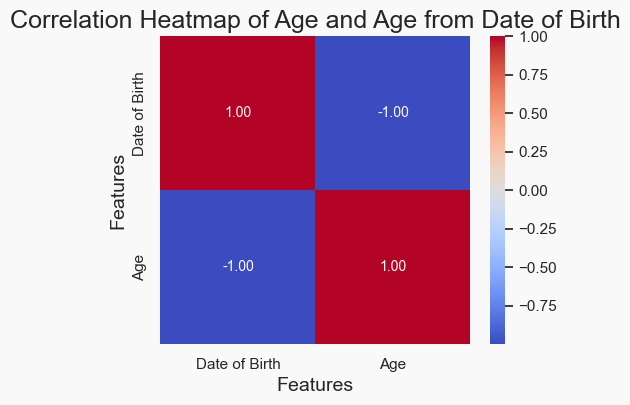

In [373]:
# Convert 'Date of Birth' column to datetime for calculation
dataset['Date of Birth'] = pd.to_datetime(dataset['Date of Birth'])

# Calculate the age from the 'date of birth' column as an integer
def calculate_age(dob):
    today = pd.Timestamp.now().date()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

dataset['Age'] = dataset['Date of Birth'].apply(calculate_age)

# Select the columns 'Date of Birth' and 'Age' for correlation
selected_columns = ['Date of Birth', 'Age']

# Compute the correlation matrix for the selected columns
correlation_matrix = dataset[selected_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 4))  # Adjust the figure size
heatmap = sns.heatmap(data=correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})

# Set labels and title
plt.title('Correlation Heatmap of Age and Age from Date of Birth', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()

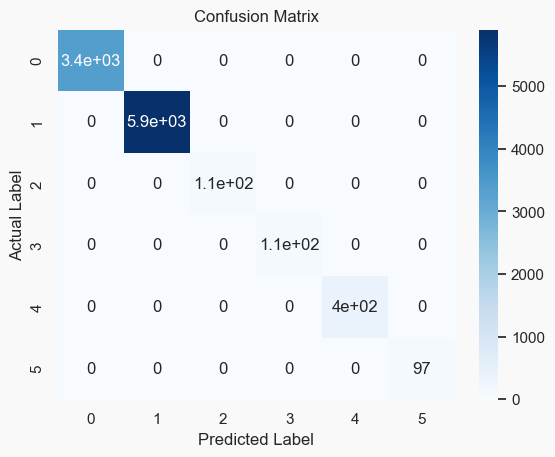

In [374]:
# Example: Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

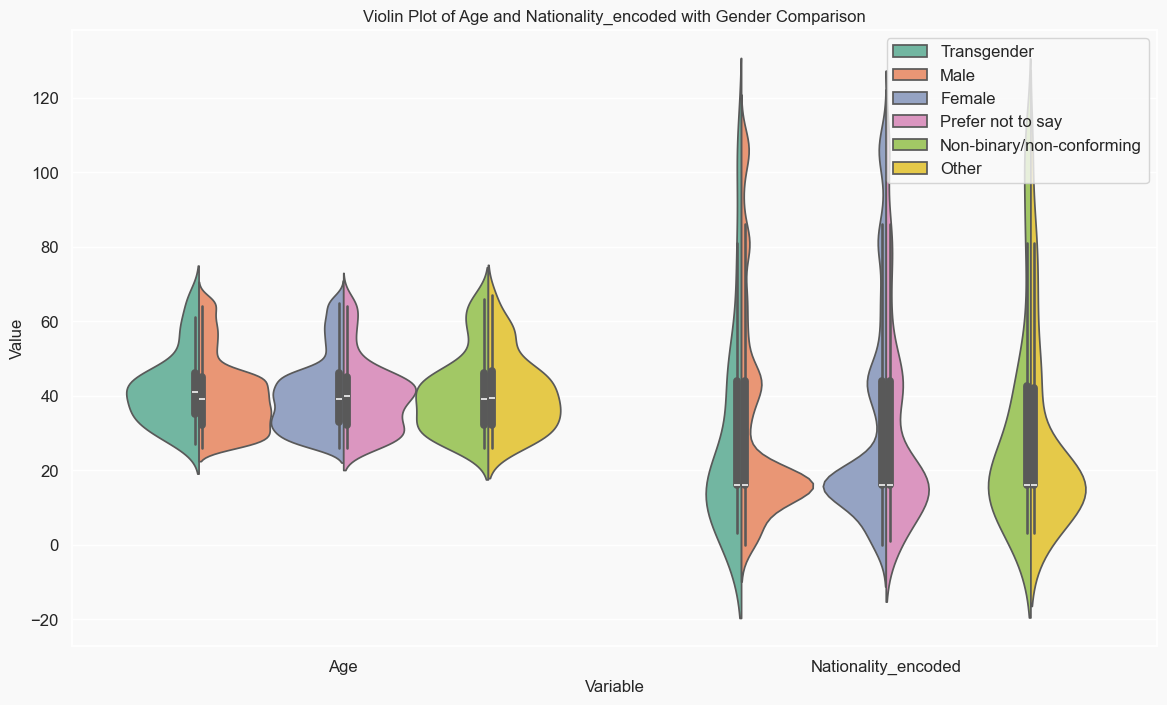

In [375]:

# Apply label encoding to the 'Nationality' column
label_encoder = LabelEncoder()
data['Nationality_encoded'] = label_encoder.fit_transform(data['Nationality'])

# Melt the DataFrame for visualization
df_long = pd.melt(data, id_vars=["Gender"], 
                  value_vars=["Age", "Nationality_encoded"],
                  var_name="Variable", value_name="Value")

# Plot the violin plot with encoded categorical variables
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_long, x="Variable", y="Value", hue="Gender", split=True, palette="Set2")
plt.title("Violin Plot of Age and Nationality_encoded with Gender Comparison")
plt.xlabel("Variable")
plt.ylabel("Value")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()


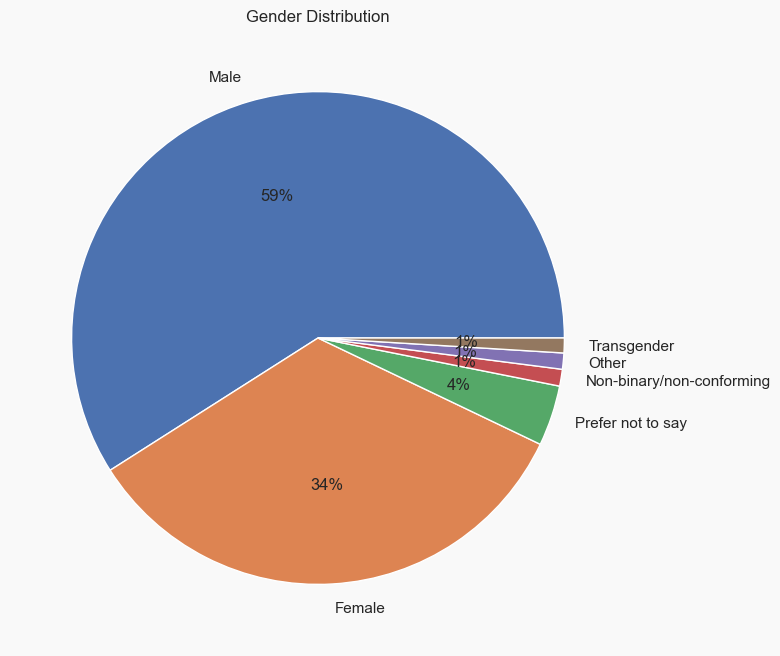

In [376]:
# Count the frequencies of each gender category
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%')
plt.title("Gender Distribution")

plt.show()

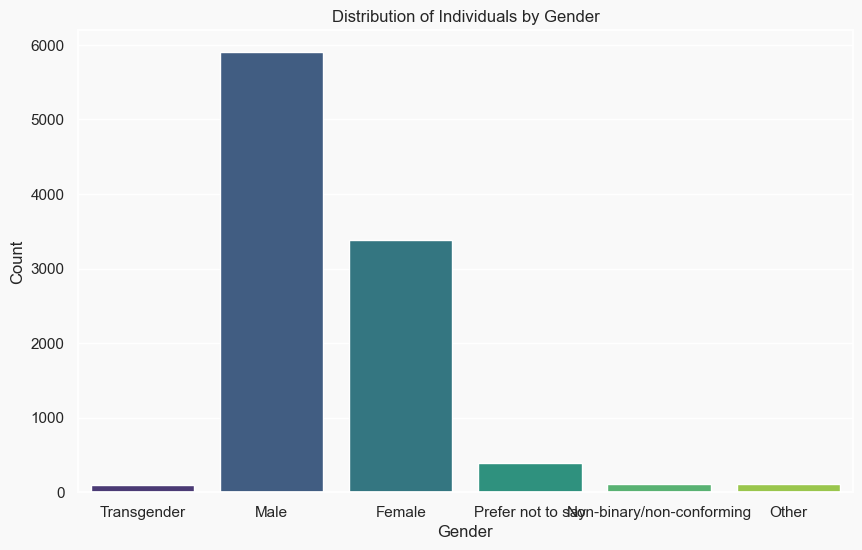

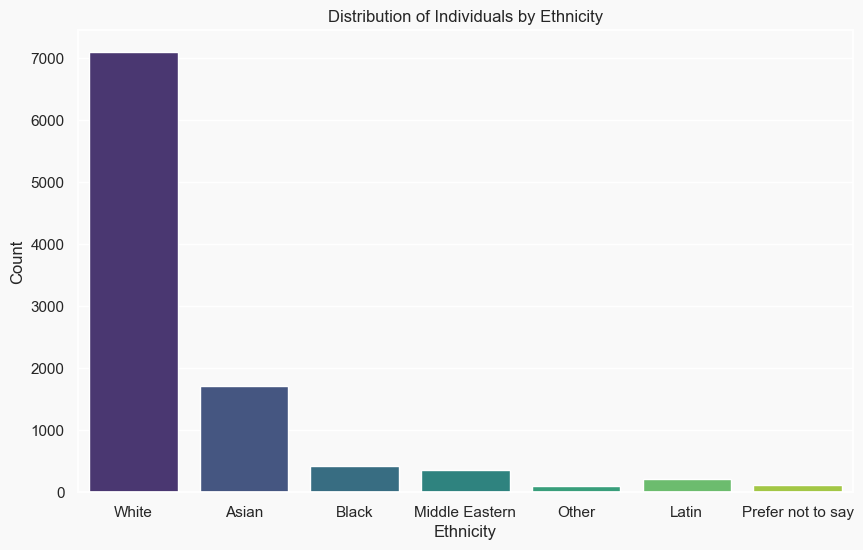

In [377]:
# Create a count plot for 'Gender'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', palette='viridis', hue='Gender', legend=False)
plt.title('Distribution of Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Create a count plot for 'Ethnicity'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Ethnicity', palette='viridis', hue='Ethnicity', legend=False)
plt.title('Distribution of Individuals by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

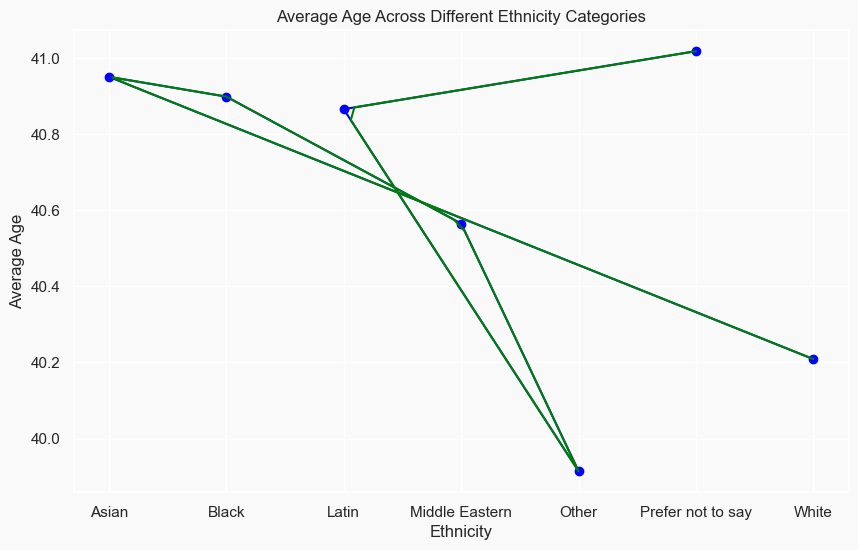

In [378]:
# Encode 'Ethnicity' column to numerical values
data['Ethnicity_numeric'] = pd.Categorical(data['Ethnicity']).codes

# Create a mapping of encoded numeric values to ethnicity values
ethnicity_mapping = dict(zip(data['Ethnicity_numeric'], data['Ethnicity']))

# List of unique 'Ethnicity' categories from the dataset
ethnicityList = data['Ethnicity_numeric'].unique()

# List to hold average 'Age' values
avgAgeList = []

# Calculating the average 'Age' for each 'Ethnicity' category
for ethnicity in ethnicityList:
    avgAge = data[data['Ethnicity_numeric'] == ethnicity]['Age'].mean()
    avgAgeList.append(avgAge)

# Plotting 'Ethnicity' vs average 'Age' with waving lines
plt.figure(figsize=(10,6))
plt.plot(ethnicityList, avgAgeList, linestyle='-', color='blue', marker='o')

# Adding waving lines using Bezier curve
t = np.linspace(0, len(ethnicityList)-1, 100)
x = np.interp(t, np.arange(len(ethnicityList)), ethnicityList)
y = np.interp(t, np.arange(len(avgAgeList)), avgAgeList)
plt.plot(x, y, linestyle='-', color='green')

# Map encoded numeric values back to ethnicity values for x-axis labels
plt.xticks(ethnicityList, [ethnicity_mapping[ethnicity] for ethnicity in ethnicityList])

plt.xlabel('Ethnicity')
plt.ylabel('Average Age')
plt.title('Average Age Across Different Ethnicity Categories')

# Displaying the plot
plt.show()

In [379]:
import warnings

# Suppress the warning
warnings.filterwarnings("ignore", message=r"Skipping features without any observed values: \['Disability'\].*")

# Filter out the numerical columns for scaling
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create a subset of the DataFrame with only numerical columns
data_numerical = data[numerical_cols]

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
data_numerical_imputed = imputer.fit_transform(data_numerical)

# Handle infinite values by replacing them with a large number
data_numerical_imputed = np.where(np.isinf(data_numerical_imputed), 
                                  np.nan, 
                                  data_numerical_imputed)
data_numerical_imputed = np.nan_to_num(data_numerical_imputed, nan=np.nanmax(data_numerical_imputed))

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical_imputed)

# Create a DataFrame from the scaled data
data_scaled_df = pd.DataFrame(data=data_scaled, columns=numerical_cols[:data_scaled.shape[1]])


In [380]:
pca = PCA(n_components = 2)
PCAdata = pca.fit_transform(data_scaled)
print("Data's shape after PCA :",PCAdata.shape)

Data's shape after PCA : (10000, 2)


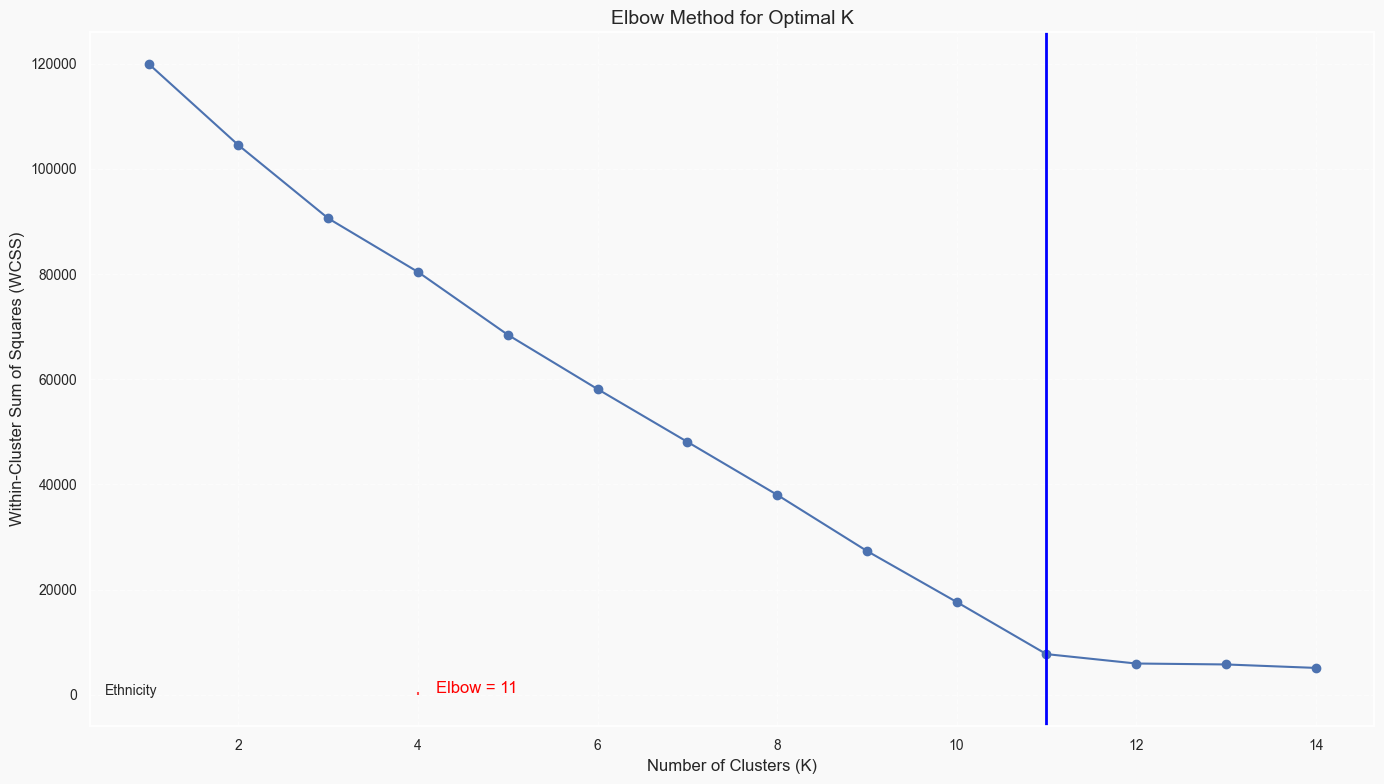

In [381]:
# Extract relevant features for clustering
selected_columns = ['Sexual_Orientation', 'Ethnicity']  # Modify these based on your data
selected_data = data[selected_columns]

# Preprocess the categorical data using one-hot encoding
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), selected_columns)], remainder='passthrough')
encoded_data = column_transformer.fit_transform(selected_data)

# Convert sparse matrix to dense matrix
encoded_data_dense = encoded_data.toarray()

# Scale the data
scaler = StandardScaler(with_mean=False)  # Set with_mean=False to avoid error
scaled_data = scaler.fit_transform(encoded_data_dense)

plt.figure(figsize=(14, 8))  # Increased figure size
wcss_list = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(scaled_data)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss_list, marker='o', linestyle='-')
plt.plot([4, 4], [0, 500], linestyle='--', alpha=0.7, color='red')
plt.text(4.2, 300, 'Elbow = 11', fontsize=12, color='red')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Draw a line at K=11
plt.axvline(x=11, color='blue', linestyle='-', linewidth=2)

# Add annotations for Sexual Orientation and Ethnicity
plt.annotate('Sexual Orientation', xy=(0.10, 0.05), xytext=(0.5, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='center')
plt.annotate('Ethnicity', xy=(0.5, 0.05), xytext=(0.8, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()


In [382]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++'  , random_state = 1)
kmeans.fit(PCAdata)
cluster_pred = kmeans.predict(PCAdata)

In [383]:
resultData = pd.DataFrame()
resultData['PC1'] = PCAdata[:,0]
resultData['PC2'] = PCAdata[:,1]
resultData['ClusterID'] = cluster_pred

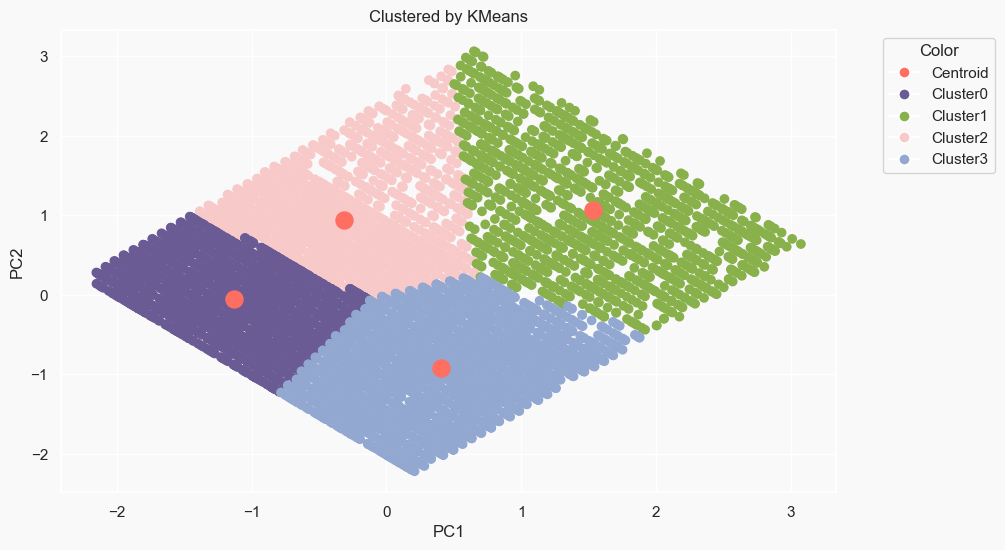

In [384]:
plt.figure(figsize=(10,6))

# Updating the color palette
palette = {"Centroid":"#FF6F61", "Cluster0":"#6B5B95", "Cluster1":"#88B04B", 
           "Cluster2":"#F7CAC9", "Cluster3":"#92A8D1"}

# Mapping cluster IDs to colors
resultData['ClusterColor'] = resultData['ClusterID'].map({0: "#6B5B95", 1: "#88B04B", 
                                                          2: "#F7CAC9", 3: "#92A8D1"})

# Plotting clusters
plt.scatter(x=resultData['PC1'], y=resultData['PC2'], c=resultData['ClusterColor'])

# Creating legend handles
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) 
           for k, v in palette.items()]
plt.legend(title='Color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting centroids
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
            marker='o', c='#FF6F61', s=150, alpha=1)

# Setting plot title and labels
pltFont = {'family':'serif', 'size':14}
plt.title("Clustered by KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Applying seaborn style
sns.set(rc={"axes.facecolor":"#F9F9F9", "figure.facecolor":"#F9F9F9"})

# Displaying the plot
plt.show()

In [385]:
# Extract relevant features for linear regression
X = data[['Sexual_Orientation']]
y = data['Age']

# Encode the categorical data using one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse:.2f}')
print(f'R-Squared (R²) on Test Set: {r2:.2f}')


Mean Squared Error (MSE) on Test Set: 103.94
R-Squared (R²) on Test Set: 0.00


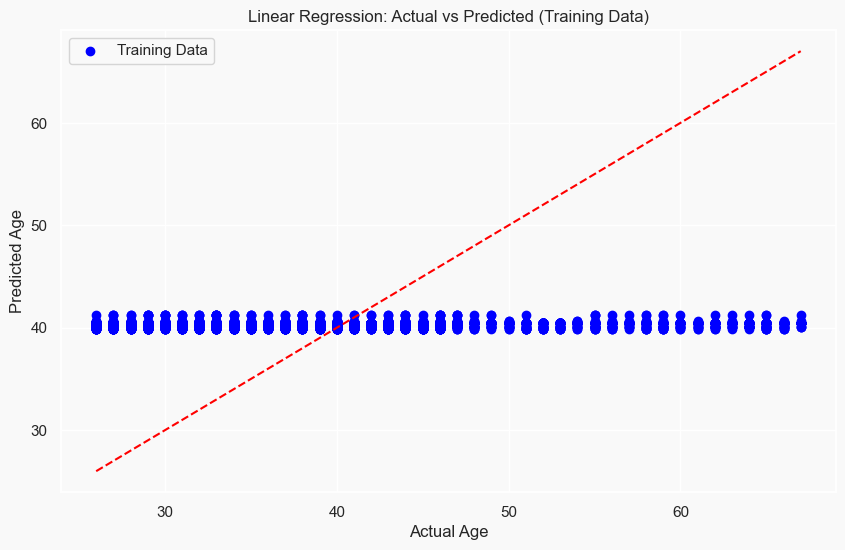

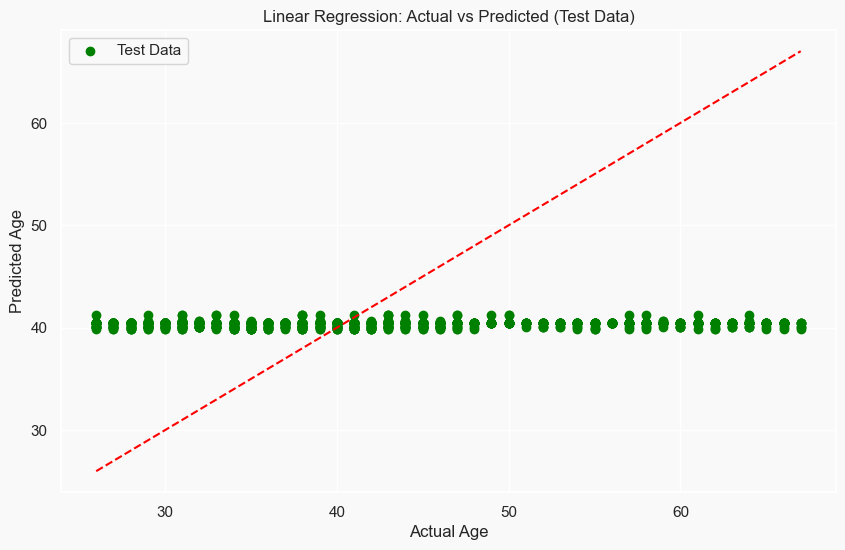

In [386]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the actual vs predicted values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression: Actual vs Predicted (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the actual vs predicted values for test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression: Actual vs Predicted (Test Data)')
plt.legend()
plt.grid(True)
plt.show()


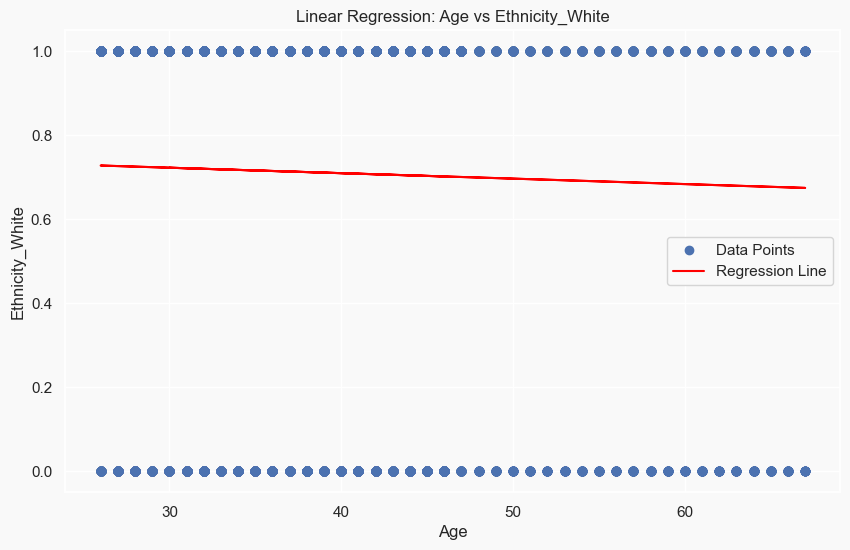

Slope: -0.001299915175363485
Intercept: 0.7617126733391587
R-squared value: 0.000841159343134356
P-value: 0.003725413690757138
Standard Error: 0.00044806041695633856


In [387]:
# Perform linear regression between 'Age' and encoded 'Ethnicity_White' columns
slope, intercept, r_value, p_value, std_err = linregress(data['Age'], data_encoded['Ethnicity_White'])
line = slope * data['Age'] + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data_encoded['Ethnicity_White'], label='Data Points')
plt.plot(data['Age'], line, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Ethnicity_White')
plt.title('Linear Regression: Age vs Ethnicity_White')
plt.legend()
plt.grid(True)
plt.show()

# Display the linear regression statistics
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared value:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)
